In [20]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [21]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [22]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [23]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [24]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [35]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [36]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [37]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [38]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [39]:
count = 100 
geocode = "38.4392897,-78.9412224,50mi" 
q = "election"                             

In [40]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) 
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])
    except:
        pass

'Mon Nov 08 21:21:50 +0000 2021'
'Mon Nov 08 21:15:01 +0000 2021'
'Mon Nov 08 20:57:39 +0000 2021'
'Mon Nov 08 20:31:19 +0000 2021'
'Mon Nov 08 20:10:03 +0000 2021'
'Mon Nov 08 19:22:17 +0000 2021'
'Mon Nov 08 18:40:57 +0000 2021'
'Mon Nov 08 16:54:25 +0000 2021'
'Mon Nov 08 16:30:08 +0000 2021'
'Mon Nov 08 16:10:04 +0000 2021'
'Mon Nov 08 15:19:10 +0000 2021'
'Mon Nov 08 15:14:33 +0000 2021'
'Mon Nov 08 15:14:32 +0000 2021'
'Mon Nov 08 14:46:41 +0000 2021'
'Mon Nov 08 14:39:31 +0000 2021'
'Mon Nov 08 14:36:04 +0000 2021'
'Mon Nov 08 14:31:35 +0000 2021'
'Mon Nov 08 14:31:04 +0000 2021'
'Mon Nov 08 14:30:49 +0000 2021'
'Mon Nov 08 14:30:12 +0000 2021'
'Mon Nov 08 14:29:58 +0000 2021'
'Mon Nov 08 14:28:03 +0000 2021'
'Mon Nov 08 13:50:05 +0000 2021'
'Mon Nov 08 13:45:57 +0000 2021'
'Mon Nov 08 13:42:25 +0000 2021'
'Mon Nov 08 13:30:04 +0000 2021'
'Mon Nov 08 13:28:04 +0000 2021'
'Mon Nov 08 13:23:55 +0000 2021'
'Mon Nov 08 13:07:21 +0000 2021'
'Mon Nov 08 12:40:28 +0000 2021'
'Mon Nov 0

In [41]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sat Nov 06 17:34:31 +0000 2021'
'Sat Nov 06 17:27:48 +0000 2021'
'Sat Nov 06 17:07:56 +0000 2021'
'Sat Nov 06 16:43:20 +0000 2021'
'Sat Nov 06 16:10:47 +0000 2021'
'Sat Nov 06 15:35:48 +0000 2021'
'Sat Nov 06 15:31:09 +0000 2021'
'Sat Nov 06 15:27:48 +0000 2021'
'Sat Nov 06 14:54:30 +0000 2021'
'Sat Nov 06 14:51:21 +0000 2021'
'Sat Nov 06 14:02:37 +0000 2021'
'Sat Nov 06 13:58:43 +0000 2021'
'Sat Nov 06 13:56:55 +0000 2021'
'Sat Nov 06 13:45:29 +0000 2021'
'Sat Nov 06 13:34:05 +0000 2021'
'Sat Nov 06 13:25:50 +0000 2021'
'Sat Nov 06 12:42:41 +0000 2021'
'Sat Nov 06 12:05:17 +0000 2021'
'Sat Nov 06 11:41:24 +0000 2021'
'Sat Nov 06 11:36:12 +0000 2021'
'Sat Nov 06 10:59:54 +0000 2021'
'Sat Nov 06 10:57:55 +0000 2021'
'Sat Nov 06 10:57:23 +0000 2021'
'Sat Nov 06 10:26:22 +0000 2021'
'Sat Nov 06 10:17:44 +0000 2021'
'Sat Nov 06 04:01:24 +0000 2021'
'Sat Nov 06 03:50:35 +0000 2021'
'Sat Nov 06 03:46:10 +0000 2021'
'Sat Nov 06 03:36:02 +0000 2021'
'Sat Nov 06 03:11:02 +0000 2021'
'Sat Nov 0

'Wed Nov 03 23:12:31 +0000 2021'
'Wed Nov 03 23:09:25 +0000 2021'
'Wed Nov 03 23:09:24 +0000 2021'
'Wed Nov 03 23:02:49 +0000 2021'
'Wed Nov 03 23:01:10 +0000 2021'
'Wed Nov 03 22:59:50 +0000 2021'
'Wed Nov 03 22:52:47 +0000 2021'
'Wed Nov 03 22:51:44 +0000 2021'
'Wed Nov 03 22:50:58 +0000 2021'
'Wed Nov 03 22:49:05 +0000 2021'
'Wed Nov 03 22:45:31 +0000 2021'
'Wed Nov 03 22:44:46 +0000 2021'
'Wed Nov 03 22:38:15 +0000 2021'
'Wed Nov 03 22:28:20 +0000 2021'
'Wed Nov 03 22:20:47 +0000 2021'
'Wed Nov 03 22:03:45 +0000 2021'
'Wed Nov 03 21:47:03 +0000 2021'
'Wed Nov 03 21:46:39 +0000 2021'
'Wed Nov 03 21:38:53 +0000 2021'
'Wed Nov 03 21:37:00 +0000 2021'
'Wed Nov 03 21:36:40 +0000 2021'
'Wed Nov 03 21:36:25 +0000 2021'
'Wed Nov 03 21:32:09 +0000 2021'
'Wed Nov 03 21:26:03 +0000 2021'
'Wed Nov 03 21:16:39 +0000 2021'
'Wed Nov 03 21:10:25 +0000 2021'
'Wed Nov 03 21:08:15 +0000 2021'
'Wed Nov 03 21:01:45 +0000 2021'
'Wed Nov 03 20:59:04 +0000 2021'
'Wed Nov 03 20:30:00 +0000 2021'
'Wed Nov 0

'Wed Nov 03 03:15:10 +0000 2021'
'Wed Nov 03 03:11:22 +0000 2021'
'Wed Nov 03 03:10:21 +0000 2021'
'Wed Nov 03 03:08:44 +0000 2021'
'Wed Nov 03 03:05:32 +0000 2021'
'Wed Nov 03 03:04:47 +0000 2021'
'Wed Nov 03 03:04:21 +0000 2021'
'Wed Nov 03 02:45:51 +0000 2021'
'Wed Nov 03 02:45:10 +0000 2021'
'Wed Nov 03 02:45:05 +0000 2021'
'Wed Nov 03 02:43:40 +0000 2021'
'Wed Nov 03 02:42:35 +0000 2021'
'Wed Nov 03 02:40:44 +0000 2021'
'Wed Nov 03 02:37:26 +0000 2021'
'Wed Nov 03 02:28:50 +0000 2021'
'Wed Nov 03 02:28:42 +0000 2021'
'Wed Nov 03 02:24:31 +0000 2021'
'Wed Nov 03 02:22:32 +0000 2021'
'Wed Nov 03 02:16:47 +0000 2021'
'Wed Nov 03 02:15:30 +0000 2021'
'Wed Nov 03 02:12:14 +0000 2021'
'Wed Nov 03 02:09:53 +0000 2021'
'Wed Nov 03 02:09:35 +0000 2021'
'Wed Nov 03 02:03:30 +0000 2021'
'Wed Nov 03 02:03:11 +0000 2021'
'Wed Nov 03 02:01:56 +0000 2021'
'Wed Nov 03 02:00:44 +0000 2021'
'Wed Nov 03 01:51:07 +0000 2021'
'Wed Nov 03 01:50:56 +0000 2021'
'Wed Nov 03 01:48:23 +0000 2021'
'Wed Nov 0

'Tue Nov 02 16:05:59 +0000 2021'
'Tue Nov 02 16:02:08 +0000 2021'
'Tue Nov 02 16:01:17 +0000 2021'
'Tue Nov 02 16:00:22 +0000 2021'
'Tue Nov 02 15:58:41 +0000 2021'
'Tue Nov 02 15:56:47 +0000 2021'
'Tue Nov 02 15:54:42 +0000 2021'
'Tue Nov 02 15:53:50 +0000 2021'
'Tue Nov 02 15:53:08 +0000 2021'
'Tue Nov 02 15:52:09 +0000 2021'
'Tue Nov 02 15:48:39 +0000 2021'
'Tue Nov 02 15:44:57 +0000 2021'
'Tue Nov 02 15:40:04 +0000 2021'
'Tue Nov 02 15:34:46 +0000 2021'
'Tue Nov 02 15:30:35 +0000 2021'
'Tue Nov 02 15:28:56 +0000 2021'
'Tue Nov 02 15:22:59 +0000 2021'
'Tue Nov 02 15:19:52 +0000 2021'
'Tue Nov 02 15:19:44 +0000 2021'
'Tue Nov 02 15:10:47 +0000 2021'
'Tue Nov 02 15:07:50 +0000 2021'
'Tue Nov 02 15:07:12 +0000 2021'
'Tue Nov 02 15:02:17 +0000 2021'
'Tue Nov 02 15:01:29 +0000 2021'
'Tue Nov 02 15:00:52 +0000 2021'
'Tue Nov 02 14:54:28 +0000 2021'
'Tue Nov 02 14:51:39 +0000 2021'
'Tue Nov 02 14:49:11 +0000 2021'
'Tue Nov 02 14:48:25 +0000 2021'
'Tue Nov 02 14:46:30 +0000 2021'
'Tue Nov 0

'Mon Nov 01 16:59:13 +0000 2021'
'Mon Nov 01 16:57:09 +0000 2021'
'Mon Nov 01 16:48:57 +0000 2021'
'Mon Nov 01 16:45:07 +0000 2021'
'Mon Nov 01 16:42:37 +0000 2021'
'Mon Nov 01 16:40:18 +0000 2021'
'Mon Nov 01 16:29:51 +0000 2021'
'Mon Nov 01 16:29:08 +0000 2021'
'Mon Nov 01 16:28:58 +0000 2021'
'Mon Nov 01 16:05:00 +0000 2021'
'Mon Nov 01 16:02:05 +0000 2021'
'Mon Nov 01 15:38:09 +0000 2021'
'Mon Nov 01 15:35:33 +0000 2021'
'Mon Nov 01 15:12:24 +0000 2021'
'Mon Nov 01 15:04:06 +0000 2021'
'Mon Nov 01 14:59:37 +0000 2021'
'Mon Nov 01 14:32:26 +0000 2021'
'Mon Nov 01 14:30:26 +0000 2021'
'Mon Nov 01 13:51:08 +0000 2021'
'Mon Nov 01 13:47:27 +0000 2021'
'Mon Nov 01 13:38:55 +0000 2021'
'Mon Nov 01 13:36:56 +0000 2021'
'Mon Nov 01 13:13:38 +0000 2021'
'Mon Nov 01 13:09:25 +0000 2021'
'Mon Nov 01 13:03:43 +0000 2021'
'Mon Nov 01 12:56:32 +0000 2021'
'Mon Nov 01 12:55:41 +0000 2021'
'Mon Nov 01 12:47:27 +0000 2021'
'Mon Nov 01 12:47:25 +0000 2021'
'Mon Nov 01 12:43:24 +0000 2021'
'Mon Nov 0

KeyboardInterrupt: 

In [42]:
print(tweet_collection.estimated_document_count())

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) 

1187
597


In [43]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english')

'text_index'

In [44]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) 

In [45]:
for document in tweet_cursor[0:10]: 
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Mark Czmyrid
text: @TerryMcAuliffe I'm proud to say I voted for you I voted for you and I voted early and I'm still taking people to t… https://t.co/XQ7I9DZ3BN
----
name: Cupcakes
text: I refuse to vote today because there is no election for me to vote in.
----
name: 2 Wheel Traveler
text: I will be voting ON election day. Early voting just gives the leftists time to calculate how many votes they need t… https://t.co/8LVhoVWJUc
----
name: Carly Haynes
text: VOTING ACCESS: Some Southern states have been adding voting restrictions, but Virginia has actually made it easier… https://t.co/zCihXylc3S
----
name: Democrats at UVA
text: Unsure what to bring to the polls? Have questions about Election Day or voting in general? Here's a Voting FAQ shee… https://t.co/JmnHkQGAHs
----
name: Bill McGee
text: @ParamedicFOURT1 @dbglisson Virginia doesn’t have voting problems. What do you know about our ballots and voting sy… https://t.co/Cvhki2xBKC
----
name: Bill McGee
text: @dbglisson @sns

In [46]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}})

In [47]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] 

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,61899b6fc4b7497725e063d6,Sun Oct 31 22:47:38 +0000 2021,1454943173348896768,1454943173348896768,@TerryMcAuliffe I'm proud to say I voted for y...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.454943e+18,...,1,1,False,False,en,NaN,NaN,NaN,NaN,NaN
1,61899b66c4b7497725e06234,Tue Nov 02 22:23:58 +0000 2021,1455661991314472960,1455661991314472960,I refuse to vote today because there is no ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,13,False,False,en,NaN,NaN,NaN,NaN,NaN
2,61899b6ec4b7497725e063cc,Mon Nov 01 00:31:28 +0000 2021,1454969301698547720,1454969301698547720,I will be voting ON election day. Early voting...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,2,7,False,False,en,NaN,NaN,NaN,NaN,NaN
3,61899b6ec4b7497725e0639e,Mon Nov 01 16:57:09 +0000 2021,1455217359959035905,1455217359959035905,VOTING ACCESS: Some Southern states have been ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,3,False,False,en,NaN,NaN,NaN,NaN,NaN
4,61899b6dc4b7497725e0639b,Mon Nov 01 17:12:46 +0000 2021,1455221286641274881,1455221286641274881,Unsure what to bring to the polls? Have questi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,6,8,False,False,en,False,NaN,NaN,NaN,NaN
5,61899b6cc4b7497725e0633c,Tue Nov 02 07:31:41 +0000 2021,1455437442140475395,1455437442140475395,@ParamedicFOURT1 @dbglisson Virginia doesn’t h...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455390e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,61899b6cc4b7497725e0633a,Tue Nov 02 07:32:50 +0000 2021,1455437729668403206,1455437729668403206,@dbglisson @snsfirearms Virginia doesn’t have ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455389e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
7,61899b6bc4b7497725e06328,Tue Nov 02 10:21:55 +0000 2021,1455480281012506625,1455480281012506625,Election Day! Don't take your right to vote fo...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,6,False,False,en,False,NaN,NaN,NaN,NaN
8,61899b6bc4b7497725e0631c,Tue Nov 02 11:11:27 +0000 2021,1455492747721388034,1455492747721388034,I know it’s only one person I convinced to vot...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,4,False,False,en,NaN,NaN,NaN,NaN,NaN
9,61899b66c4b7497725e0623c,Tue Nov 02 22:02:40 +0000 2021,1455656632172650511,1455656632172650511,There is 1 hour left to vote in Virginia. Thi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

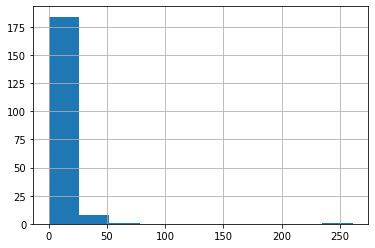

In [48]:
tweet_df["favorite_count"].hist() 